# San Francisco Housing Cost Analysis

In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [2]:
 # Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [3]:
 # Read the census data into a Pandas DataFrame
file_path = Path("sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

Hint: Use the Pandas groupby function.

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [64]:
# Calculate the mean number of housing units per year (hint: use groupby) 
    
housing_units= sfo_data.groupby('year')['housing_units'].mean()

housing_units

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

In [97]:
housing_units.to_csv('Housing_Units.csv')


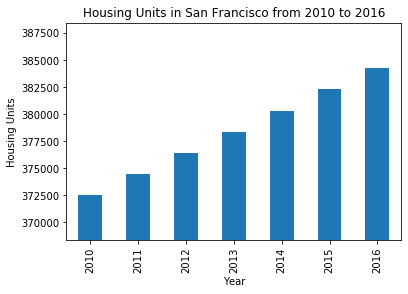

In [99]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart

ax = housing_units.plot.bar(title='Housing Units in San Francisco from 2010 to 2016')



boundry = housing_units.std()
ax.set_ylim([housing_units.min()-boundry, housing_units.max()+boundry])
ax.set(xlabel='Year', ylabel='Housing Units')


plt.show()
plt.close(ax.figure)

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts


Optional challenge: Plot each line chart in a different color.

In [69]:
# Calculate the average sale price per square foot and average gross rent

avg_rent_sqr_foot = sfo_data.groupby('year')[['sale_price_sqr_foot', 'gross_rent']].mean()
avg_rent_sqr_foot

sale_price_sqr_foot  gross_rent
year                                 
2010           369.344353        1239
2011           341.903429        1530
2012           399.389968        2324
2013           483.600304        2971
2014           556.277273        3528
2015           632.540352        3739
2016           697.643709        4390

[Text(0, 0.5, 'Price per SqFt'), Text(0.5, 0, 'Year')]

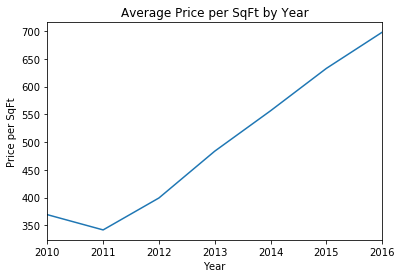

In [101]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent
# Line chart for average sale price per square foot

ax = avg_rent_sqr_foot['sale_price_sqr_foot'].plot(title='Average Price per SqFt by Year')

ax.set_xlim([avg_rent_sqr_foot.index.min(), avg_rent_sqr_foot.index.max()])
ax.set(xlabel='Year', ylabel='Price per SqFt')
                            

[Text(0, 0.5, 'Price per SqFt'), Text(0.5, 0, 'Year')]

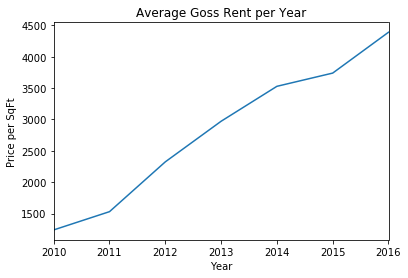

In [102]:
# Line chart for average montly rent

ax = avg_rent_sqr_foot['gross_rent'].plot(title='Average Goss Rent per Year')

ax.set_xlim([avg_rent_sqr_foot.index.min(), avg_rent_sqr_foot.index.max()])
ax.set(xlabel='Year', ylabel='Price per SqFt')

# Average Prices by Neighborhood



In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.


Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [74]:
# Group by year and neighborhood and then create a new dataframe of the mean values

ngh_df = sfo_data.groupby(['year','neighborhood']).mean().reset_index()
ngh_df.head(10)

year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
0  2010      Alamo Square           291.182945         372560        1239
1  2010        Anza Vista           267.932583         372560        1239
2  2010           Bayview           170.098665         372560        1239
3  2010  Buena Vista Park           347.394919         372560        1239
4  2010  Central Richmond           319.027623         372560        1239
5  2010    Central Sunset           418.172493         372560        1239
6  2010    Corona Heights           369.359338         372560        1239
7  2010        Cow Hollow           569.379968         372560        1239
8  2010     Croker Amazon           165.645730         372560        1239
9  2010   Diamond Heights           456.930822         372560        1239

In [75]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood

ngh_df.hvplot(label='Average Price per Square feet by year ',
                       x='year',
                       y='sale_price_sqr_foot', 
                       xlabel='Year',
                       ylabel='Avg. Sales Price per Square Foot', 
                       groupby='neighborhood')


:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [103]:
 # Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood

ngh_df.hvplot(label='Gross Rent ',
                       x='year',
                       y='gross_rent', 
                       xlabel='Year',
                       ylabel='Gross Rent', 
                       groupby='neighborhood')

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [76]:
# Getting the data from the top 10 expensive neighborhoods to own

avg_values_ngh = ngh_df.drop(columns=['year']).groupby('neighborhood').mean().round(2)
expensive_ngh = avg_values_ngh.sort_values("sale_price_sqr_foot", ascending = False).head(10)

expensive_ngh

sale_price_sqr_foot  housing_units  gross_rent
neighborhood                                                         
Union Square District               903.99      377427.50     2555.17
Merced Heights                      788.84      380348.00     3414.00
Miraloma Park                       779.81      375967.25     2155.25
Pacific Heights                     689.56      378401.00     2817.29
Westwood Park                       687.09      382295.00     3959.00
Telegraph Hill                      676.51      378401.00     2817.29
Presidio Heights                    675.35      378401.00     2817.29
Cow Hollow                          665.96      378401.00     2817.29
Potrero Hill                        662.01      378401.00     2817.29
South Beach                         650.12      375805.00     2099.00

In [79]:
# Plotting the data from the top 10 expensive neighborhoods

expensive_ngh['sale_price_sqr_foot'].hvplot.bar(label='Top 10 - Expensive Neighborhoods in SFO',
                                                           xlabel='Neighborhood',
                                                           ylabel='Avg. Sales Price per Square Foot', 
                                                           height=400,
                                                           rot=90)

:Bars   [neighborhood]   (sale_price_sqr_foot)

## Comparing cost to purchase versus rental income

In this section, you will use hvplot to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year. 


Hint: Use the hvplot parameter, groupby, to create a dropdown selector for the neighborhood.

In [105]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood

ngh_df.head(10)

year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
0  2010      Alamo Square           291.182945         372560        1239
1  2010        Anza Vista           267.932583         372560        1239
2  2010           Bayview           170.098665         372560        1239
3  2010  Buena Vista Park           347.394919         372560        1239
4  2010  Central Richmond           319.027623         372560        1239
5  2010    Central Sunset           418.172493         372560        1239
6  2010    Corona Heights           369.359338         372560        1239
7  2010        Cow Hollow           569.379968         372560        1239
8  2010     Croker Amazon           165.645730         372560        1239
9  2010   Diamond Heights           456.930822         372560        1239

In [96]:
# Plotting the data from the top 10 expensive neighborhoods

ngh_df.hvplot.bar("year", ['gross_rent', 'sale_price_sqr_foot'],
                label='Top 10 - Expensive Neighborhoods in SFO',
                xlabel='Neighborhood',
                ylabel='Number of housing units',
                groupby='neighborhood',
                height=400,
                rot=90)

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

# Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a scatter_mapbox from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [35]:
# Load neighborhoods coordinates data

ngh_coordinates = Path("neighborhoods_coordinates.csv")
df_ngh_locations = pd.read_csv(ngh_coordinates)
df_ngh_locations.head()

Neighborhood        Lat         Lon
0     Alamo Square  37.791012 -122.402100
1       Anza Vista  37.779598 -122.443451
2          Bayview  37.734670 -122.401060
3  Bayview Heights  37.728740 -122.410980
4   Bernal Heights  37.728630 -122.443050

 ### Data Preparation

You will need to join the location data with the mean values per neighborhood.

    1. Calculate the mean values for each neighborhood.
    
    2. Join the average values with the neighborhood locations.

In [80]:
# Calculate the mean values for each neighborhood
avg_values_ngh=avg_values_ngh.reset_index().rename(columns = {'neighborhood':'Neighborhood'})
avg_values_ngh.head()

Neighborhood  sale_price_sqr_foot  housing_units  gross_rent
0     Alamo Square               366.02       378401.0     2817.29
1       Anza Vista               373.38       379050.0     3031.83
2          Bayview               204.59       376454.0     2318.40
3  Bayview Heights               590.79       382295.0     3739.00
4  Bernal Heights                576.75       379374.5     3080.33

In [84]:
# Join the average values with the neighborhood locations

ngh_location = pd.merge(avg_values_ngh, df_ngh_locations, on='Neighborhood')
ngh_location.head()

Neighborhood  sale_price_sqr_foot  housing_units  gross_rent  \
0      Alamo Square               366.02       378401.0     2817.29   
1        Anza Vista               373.38       379050.0     3031.83   
2           Bayview               204.59       376454.0     2318.40   
3   Bayview Heights               590.79       382295.0     3739.00   
4  Buena Vista Park               452.68       378076.5     2698.83   

         Lat         Lon  
0  37.791012 -122.402100  
1  37.779598 -122.443451  
2  37.734670 -122.401060  
3  37.728740 -122.410980  
4  37.768160 -122.439330

### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express scatter_mapbox visualization.

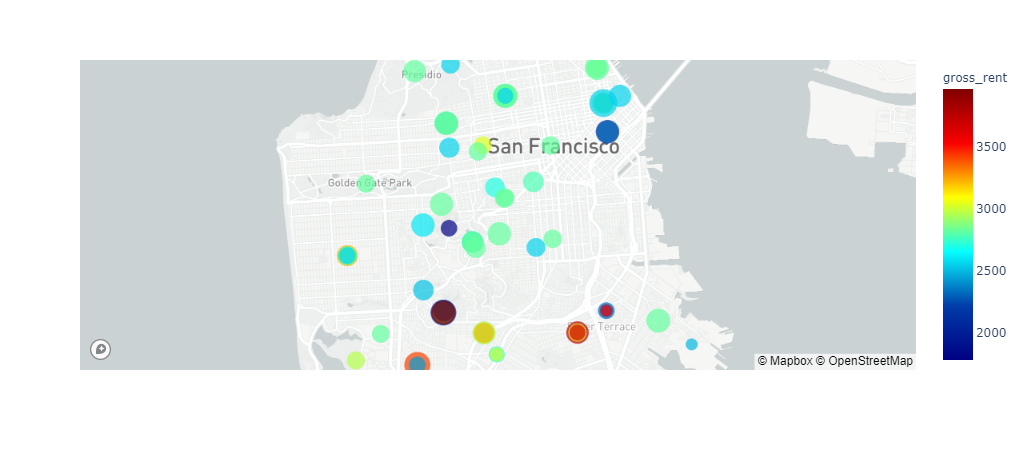

In [91]:
# Create a scatter mapbox to analyze neighborhood info

px.set_mapbox_access_token(map_box_api)
px.scatter_mapbox(ngh_location,
                  lat="Lat",
                  lon="Lon",
                  size='sale_price_sqr_foot', 
                  color='gross_rent',
                  zoom=11,
                  hover_name='Neighborhood',
                  color_continuous_scale=px.colors.sequential.Jet
                 )

# Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods.

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [38]:
 # Fetch the data from all expensive neighborhoods per year.
    


## Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year

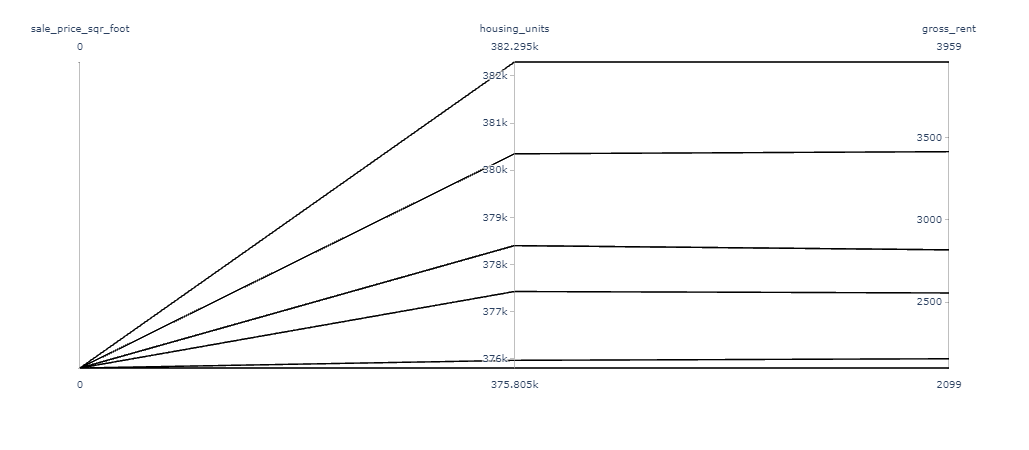

In [106]:
# Parallel Categories Plot
px.parallel_coordinates(expensive_ngh[['sale_price_sqr_foot', 'housing_units', 'gross_rent']], color='sale_price_sqr_foot')

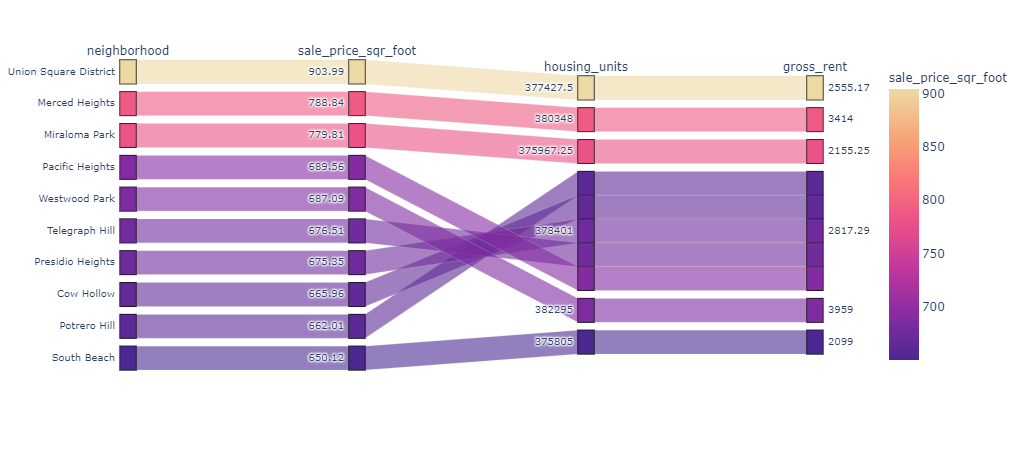

In [108]:
 # Parallel Coordinates Plot
    
px.parallel_categories(expensive_ngh.reset_index(), color='sale_price_sqr_foot',color_continuous_scale=px.colors.sequential.Agsunset)